https://velog.io/@dlskawns/Clustering%EA%B4%80%EB%A0%A8-%EC%8B%A4%EC%8A%B5-%EB%B0%8F-%EC%9A%A9%EC%96%B4-%EC%A0%95%EB%A6%AC

In [1]:



# 독립 변수
'''
species : 펭귄의 종을 나타내는 문자열
island : 샘플들이 수집된 Palmer Station 근처 섬 이름
Culmen Length (mm) : 펭귄 옆모습 기준 부리의 가로 길이
Culmen Depth (mm) : 펭귄 옆모습 기준 부리의 세로 길이
Flipper Length (mm) : 펭귄의 팔(날개) 길이
'''
# 종속 변수
'''
Body Mass : 펭귄의 몸무게를 나타내는 숫자 (g)
'''

#### species 확인으로 변경

# 독립 변수
'''
island : 샘플들이 수집된 Palmer Station 근처 섬 이름
Culmen Length (mm) : 펭귄 옆모습 기준 부리의 가로 길이
Culmen Depth (mm) : 펭귄 옆모습 기준 부리의 세로 길이
Flipper Length (mm) : 펭귄의 팔(날개) 길이
Body Mass : 펭귄의 몸무게를 나타내는 숫자 (g)
'''
# 종속 변수
'''
species : 펭귄의 종을 나타내는 문자열
'''


'\nspecies : 펭귄의 종을 나타내는 문자열\n'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

df = sns.load_dataset('penguins')   # 펭귄 dataset load
df

df.dropna(inplace=True) #df의 결측치들은 행째로 제거 (inplace=True를 통해 즉시 데이터에 적용)

df_num = df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]   # df_num 변수에 numerical column만 저장

In [3]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [4]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()             # 표준화를 하기 위한 StandardScaler를 scaler변수에 넣는다
scaler.fit(df_num)                    # numerical data만 뽑았던 df_num dataset에 해당 scaler를 적용시킨다.
df_s = scaler.transform(df_num)       # StandardScaler가 적용된 df_num을 해당 scalar대로 변환한다.
df_s = pd.DataFrame(df_s, index = df_num.index, columns=df_num.columns) # 변환된 데이터셋은 수치화 되어있으므로 데이터프레임화 시켜준다.
df_s

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.896042,0.780732,-1.426752,-0.568475
1,-0.822788,0.119584,-1.069474,-0.506286
2,-0.676280,0.424729,-0.426373,-1.190361
4,-1.335566,1.085877,-0.569284,-0.941606
5,-0.859415,1.747026,-0.783651,-0.692852
...,...,...,...,...
338,0.587352,-1.762145,0.931283,0.892957
340,0.514098,-1.457000,1.002739,0.799674
341,1.173384,-0.744994,1.502928,1.919069
342,0.221082,-1.202712,0.788372,1.234995


In [5]:
from sklearn.decomposition import PCA # sklearn 라이브러리의 PCA를 import한다

pca = PCA(n_components = 2)           # 2차원으로 시각화를 진행할 것이므로 2개로 설정한다.
pca.fit(df_s)
df_p = pca.transform(df_s)
df_p = pd.DataFrame(df_p, columns = ['PC1','PC2']) #PCA진행 한 두 개의 값을 column으로 데이터프레임화 시킨다.
df_p

,PC1,PC2
0,-1.853593,0.032069
1,-1.316254,-0.443527
2,-1.376605,-0.161230
3,-1.885288,-0.012351
4,-1.919981,0.817598
...,...,...
328,1.997716,-0.976771
329,1.832651,-0.784510
330,2.751505,0.266556
331,1.713854,-0.725875


In [7]:
from sklearn.cluster import KMeans              # KMeans 라이브러리를 불러온다.

sum_of_squared_distance = []                    # k의 개수를 구하기 위한 엘보우 메소드의 요소를 넣을 list 변수 생성

K = range(1,10)                                 # 9개만 구해본다.

for k in K:                                     # 1부터 9까지의 for문 반복을 통해 각 Kmeans의 군집을 몇개까지 하면 될지 측정한다.
    km = KMeans(n_clusters = k)                   # KMeans 함수의 설정 - n_clusters = 군집의 개수(정확히는 군집의 centroid 개수이다)
    km = km.fit(df_p)                             # 해당 군집중앙의 개수를 정규화(표준화) 해놓은 df_p data에 적용
    sum_of_squared_distance.append(km.inertia_)   # inertia_함수를 이용해 군집간 거리가 최소가 되는 k를 누적하여 파악한다.

C:\Users\CDL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


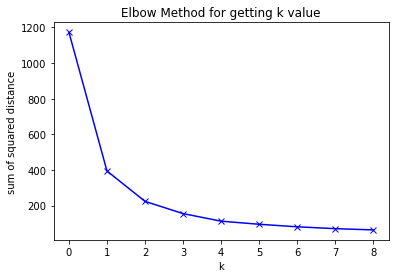

In [8]:
import matplotlib.pyplot as plt                # 그래프를 그리기 matplotlib 라이브러리를 사용한다.

plt.plot(sum_of_squared_distance, '-bx')        # (default = line) plot을 그리고, 컬러를 blue, 포인터를 x로 놓는다. 
plt.xlabel('k')                                 # x축은 k로 지정
plt.ylabel('sum of squared distance')           # y축엔 거리제곱합의 이름
plt.title('Elbow Method for getting k value')   # 제목도 변경한다.
plt.show()

In [9]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_p)
label = kmeans.labels_
label = pd.Series(label)
df_p['label'] = label.values
df_p

,PC1,PC2,label
0,-1.853593,0.032069,0
1,-1.316254,-0.443527,0
2,-1.376605,-0.161230,0
3,-1.885288,-0.012351,0
4,-1.919981,0.817598,0
...,...,...,...
328,1.997716,-0.976771,1
329,1.832651,-0.784510,1
330,2.751505,0.266556,1
331,1.713854,-0.725875,1


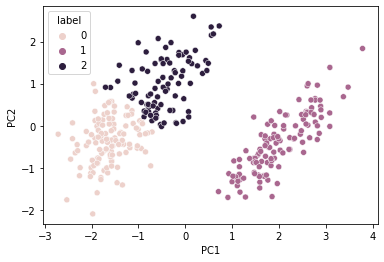

In [10]:
import seaborn as sns		# 시각화에 발달된 seaborn 라이브러리를 import한다.

sns.scatterplot(data = df_p, x = 'PC1',y = 'PC2', hue = 'label'); 

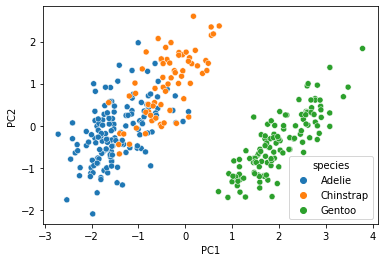

In [11]:
df_p['species'] = df['species'].values # 기존 df의 species feature를 df_p에 추가한다.
sns.scatterplot(data = df_p, x = 'PC1',y = 'PC2', hue = 'species'); # scatter plot을 띄운다.